# Khách hàng muốn đầu tư về đồ công nghệ thì nên đầu tư vào vùng nào và nên đầu tư loại sản phẩm nào.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# đọc dữ liệu
df = pd.read_csv('Câu 5.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year']\
    .replace({'2015': 1, '2016': 2, '2017': 3, '2018': 4})
# 1,2,3,4 lần lượt là 2015, 2016, 2017, 2018

In [5]:
df['Segment'] = df['Segment'].astype(str)
df['Segment'] = df['Segment']\
    .replace({'Consumer': 1, 'Corporate': 2, 'Home Office': 3})
# 1,2,3 lần lượt là Consumer, corporate, Home office


In [6]:
df['Region'] = df['Region'].astype(str)
df['Region'] = df['Region']\
    .replace({'West': 1, 'East': 2, 'Central': 3, 'South': 4}) 
## 1,2,3,4 lần lượt là West East, Central, South

In [7]:
df['Category'] = df['Category'].astype(str)
df['Category'] = df['Category']\
    .replace({'Office Supplies': 1, 'Furniture': 2, 'Technology': 3}) 
## 1,2,3 lần lượt là Office Supplies, Furniture, Teachnology

In [8]:
df['Sales review'] = df['Sales review'].astype(str)
df['Sales review'] = df['Sales review']\
    .replace({'Thấp': 1, 'Trung Bình': 2, 'Cao': 3, 'Siêu Cao': 4}) 
## 1,2,3,4 lần lượt là thấp, trung bình, cao, siêu cao

In [9]:
df['Month'] = df['Month'].astype(str)
df['Month'] = df['Month']\
    .replace({'1' : 1, '2' : 1,  '3' : 1,\
        '4' : 2, '5' : 2 , '6' : 2,\
            '7' : 3, '8' : 3 , '9' : 3,\
                '10' : 4, '11' : 4 , '12' : 4})

In [10]:
df.head()

,Order Date,Year,Month,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Sales review
0,2017-11-08,3,4,1,United States,Henderson,Kentucky,4,2,Bookcases,261.960000,4
1,2017-11-08,3,4,1,United States,Henderson,Kentucky,4,2,Chairs,731.940000,4
2,2017-06-12,3,2,2,United States,Los Angeles,California,1,1,Labels,14.620000,1
3,2016-10-11,2,4,1,United States,Fort Lauderdale,Florida,4,2,Tables,201.864499,3
4,2016-10-11,2,4,1,United States,Fort Lauderdale,Florida,4,1,Storage,22.368000,2


In [11]:
# Chọn các cột tính năng là Thời gian ( năm, tháng) , khu vực, dối tượng khách hàng, loại sản phẩm và đánh giá sales để phục vụ cho câu 5.
# Dựa trên kiến thức thực tế, chúng ta có thể thấy rằng doanh số sẽ phụ thuộc vào các thời điểm trong năm, với mỗi đối tượng khách hàng, sản phẩm 
# và tùy theo từng vùng sẽ có doanh số khác nhau vì vậy trong trường hợp này không cần kiểm định sự tương quan giữa các tính năng trong các cột đã chọn.
# Khi chọn khu vực thì các thành phố và các bang sẽ nằm trong đó, tương tự như các cột còn lại.

In [12]:
df_transform = df[['Year','Month','Segment','Region','Category','Sales review']]

In [13]:
df_transform['Sales review'] = df_transform['Sales review'].astype(str)

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_12984/1312825014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transform['Sales review'] = df_transform['Sales review'].astype(str)


##### Decision Tree

In [14]:
# tạo dữ liệu để train model
y = df_transform['Sales review'].values.reshape(-1, 1)
X = df_transform.drop(columns='Sales review').values 

In [15]:
print(X.shape, y.shape) 

(9800, 5) (9800, 1)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)  # 10% dùng để test

In [17]:
# Xay dung cay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 

my_tree = DecisionTreeClassifier()
my_tree.fit(X_train, y_train)  

DecisionTreeClassifier()

In [18]:
# Du doan tren du lieu test

y_pred = my_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[439 182  78  36]
 [334 168 100  94]
 [278 135 166 199]
 [163 110 181 277]]


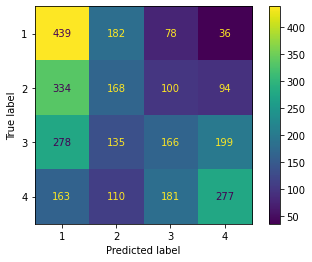

In [19]:
plot_confusion_matrix(my_tree, X_test, y_test)

In [20]:
# from sklearn import tree
# fig = plt.figure(figsize=(15,10))
# _ = tree.plot_tree(my_tree, feature_names=['Cost'], class_names=['Profit'], filled=True)

In [23]:
df_transform.to_csv('df_trans.csv')